#### Churn - Leave / Transfer from a particular company/firm

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Libraries for Neural network
import tensorflow as tf
from tensorflow import keras

In [2]:
# Loading dataset

df = pd.read_csv("churn_dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Data Exploration

In [3]:
df.drop('customerID', axis='columns', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [4]:
# Converting data type of totalcharges from object(string) to float

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [5]:
df['TotalCharges'] = df['TotalCharges'].fillna(value=0)

#### Data Cleaning

In [6]:
for column in df:
    if df[column].dtypes == "object":
        print(f'{column}: {df[column].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [7]:
df.replace("No internet service", "No", inplace=True)
df.replace("No phone service", "No", inplace=True)

In [8]:
# Converting string values to boolean/int values

labelEncoder = LabelEncoder()

for column in df:
    if df[column].dtypes == "object" and len(df[column].unique()) == 2:
        df[column] = labelEncoder.fit_transform(df[column])

In [9]:
# One hot encoding for columns with more than 2 unique values

df = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'])
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

#### Data Visualization

/home/rutvik/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


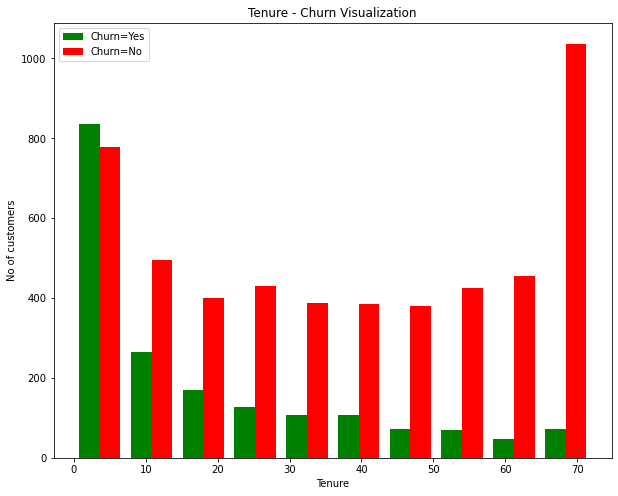

In [14]:
tenure_churn_no = df[df["Churn"] == 0]["tenure"]
tenure_churn_yes = df[df["Churn"] == 1]["tenure"]

plt.figure(figsize=(10, 8))
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=["Churn=Yes", "Churn=No"])
plt.xlabel("Tenure")
plt.ylabel("No of customers")
plt.title("Tenure - Churn Visualization")
plt.legend()
plt.show()

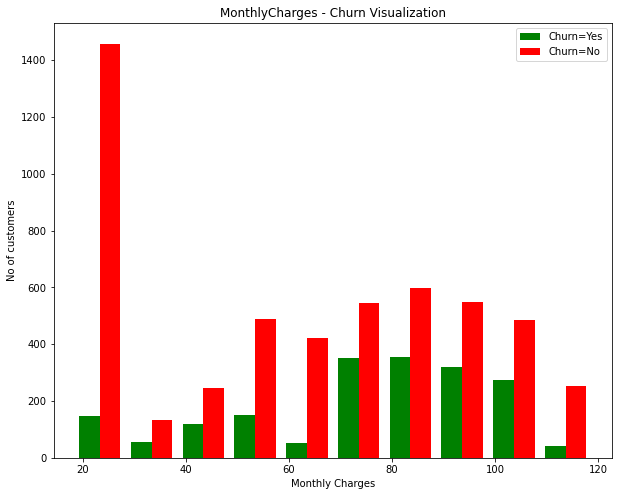

In [15]:
mc_churn_no = df[df["Churn"] == 0]["MonthlyCharges"]
mc_churn_yes = df[df["Churn"] == 1]["MonthlyCharges"]

plt.figure(figsize=(10, 8))
plt.hist([mc_churn_yes, mc_churn_no], color=['green', 'red'], label=["Churn=Yes", "Churn=No"])
plt.xlabel("Monthly Charges")
plt.ylabel("No of customers")
plt.title("MonthlyCharges - Churn Visualization")
plt.legend()
plt.show()

#### Data Scaling

In [10]:
cols_to_scale = ["tenure", "MonthlyCharges", "TotalCharges"]

scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

#### Creating and training model

In [11]:
X = df.drop("Churn", axis="columns")
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [18]:
X_train.shape, X_test.shape

((5634, 26), (1409, 26))

In [26]:
# Creating NN Model

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),  # keras.layers.Dense(output_shape, input_shape, activation_function)
    keras.layers.Dense(20, activation='relu'),  # keras.layers.Dense(output_shape, activation_function) - no input_shape required
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
177/177 [==============================] - 1s 2ms/step - loss: 0.5347 - accuracy: 0.7173
Epoch 2/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4341 - accuracy: 0.7872
Epoch 3/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.7969
Epoch 4/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4195 - accuracy: 0.8009
Epoch 5/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8033
Epoch 6/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8062
Epoch 7/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.8065
Epoch 8/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8062
Epoch 9/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8083
Epoch 10/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8065

In [20]:
# Loss and accuracy on test values

loss, accuracy = model.evaluate(X_test, y_test)

loss, accuracy*100

45/45 [==============================] - 0s 2ms/step - loss: 0.4638 - accuracy: 0.7878


(0.46378228068351746, 78.77927422523499)

In [21]:
yp = model.predict(X_test)

y_pred = []

for e in yp:
    if e > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1023
           1       0.61      0.60      0.61       386

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409



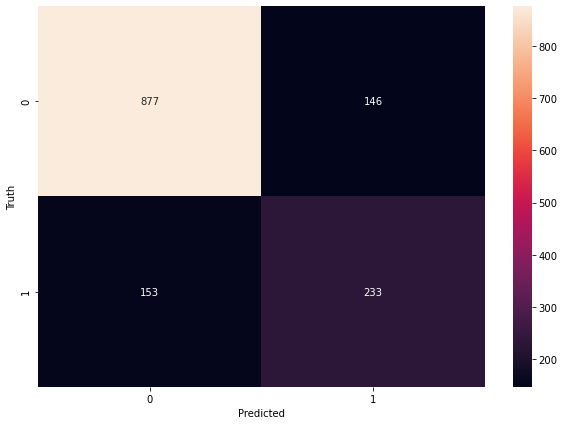

In [23]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

#### Handling imbalanced data

In [12]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_shape=(26,), activation='relu'),  # keras.layers.Dense(output_shape, input_shape, activation_function)
        keras.layers.Dense(20, activation='relu'),  # keras.layers.Dense(output_shape, activation_function) - no input_shape required
        keras.layers.Dense(1, activation="sigmoid")
    ])

    model.compile(
        optimizer="adam",
        loss=loss,
        metrics=["accuracy"]
    )
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=10)
    else:
        model.fit(X_train, y_train, epochs=10, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [37]:
y_preds = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1)

Epoch 1/10
94/94 [==============================] - 0s 1ms/step - loss: 0.6116 - accuracy: 0.6773
Epoch 2/10
94/94 [==============================] - 0s 1ms/step - loss: 0.5230 - accuracy: 0.7408
Epoch 3/10
94/94 [==============================] - 0s 1ms/step - loss: 0.5091 - accuracy: 0.7438
Epoch 4/10
94/94 [==============================] - 0s 1ms/step - loss: 0.5025 - accuracy: 0.7512
Epoch 5/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4974 - accuracy: 0.7572
Epoch 6/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4954 - accuracy: 0.7565
Epoch 7/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4925 - accuracy: 0.7552
Epoch 8/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4899 - accuracy: 0.7589
Epoch 9/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4883 - accuracy: 0.7579
Epoch 10/10
24/24 [==============================] - 0s 788us/step - loss: 0.4498 - accuracy: 0.7741
[0.44981861114501

#### Under Sampling

In [30]:
count_0, count_1 = df["Churn"].value_counts()
count_0, count_1

(5174, 1869)

In [33]:
df_0_under = df[df["Churn"] == 0].sample(count_1)

df_under_sample = pd.concat([df_0_under, df[df["Churn"] == 1]], axis=0)
df_under_sample["Churn"].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [34]:
X = df_under_sample.drop("Churn", axis="columns")
y = df_under_sample["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

In [38]:
y_preds = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1)

Epoch 1/10
94/94 [==============================] - 0s 985us/step - loss: 0.6222 - accuracy: 0.6579
Epoch 2/10
94/94 [==============================] - 0s 1ms/step - loss: 0.5354 - accuracy: 0.7355
Epoch 3/10
94/94 [==============================] - 0s 1ms/step - loss: 0.5189 - accuracy: 0.7441
Epoch 4/10
94/94 [==============================] - 0s 1ms/step - loss: 0.5111 - accuracy: 0.7485
Epoch 5/10
94/94 [==============================] - 0s 1ms/step - loss: 0.5066 - accuracy: 0.7545
Epoch 6/10
94/94 [==============================] - 0s 1ms/step - loss: 0.5019 - accuracy: 0.7522
Epoch 7/10
94/94 [==============================] - 0s 1ms/step - loss: 0.5000 - accuracy: 0.7528
Epoch 8/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4970 - accuracy: 0.7522
Epoch 9/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4947 - accuracy: 0.7532
Epoch 10/10
24/24 [==============================] - 0s 869us/step - loss: 0.4566 - accuracy: 0.7834
[0.456561237573

#### Over Sampling

In [39]:
df_1_over = df[df["Churn"] == 1].sample(count_0, replace=True)

df_over_sample = pd.concat([df_1_over, df[df["Churn"] == 0]], axis=0)
df_over_sample["Churn"].value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [40]:
X = df_over_sample.drop("Churn", axis="columns")
y = df_over_sample["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

In [41]:
y_preds = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1)

Epoch 1/10
259/259 [==============================] - 1s 2ms/step - loss: 0.5635 - accuracy: 0.7120
Epoch 2/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4966 - accuracy: 0.7578
Epoch 3/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.7660
Epoch 4/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.7637
Epoch 5/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7685
Epoch 6/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.7678
Epoch 7/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4757 - accuracy: 0.7712
Epoch 8/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4737 - accuracy: 0.7729
Epoch 9/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4714 - accuracy: 0.7731
Epoch 10/10
65/65 [==============================] - 0s 1ms/step - loss: 0.4770 - accuracy: 0.7691
[

#### SMOTE - Over sampling by producing synthetic samples

In [42]:
X = df.drop("Churn", axis="columns")
y = df["Churn"]

In [43]:
# !pip install imbalanced-learn

     |████████████████████████████████| 189 kB 167 kB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 22 kB/s  eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1


In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="minority")
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=5, stratify=y_sm)

y_preds = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1)

Epoch 1/10
259/259 [==============================] - 1s 1ms/step - loss: 0.5487 - accuracy: 0.7135
Epoch 2/10
259/259 [==============================] - 0s 1ms/step - loss: 0.4767 - accuracy: 0.7677
Epoch 3/10
259/259 [==============================] - 0s 1ms/step - loss: 0.4669 - accuracy: 0.7762
Epoch 4/10
259/259 [==============================] - 0s 1ms/step - loss: 0.4603 - accuracy: 0.7770
Epoch 5/10
259/259 [==============================] - 0s 1ms/step - loss: 0.4551 - accuracy: 0.7786
Epoch 6/10
259/259 [==============================] - 0s 1ms/step - loss: 0.4522 - accuracy: 0.7800
Epoch 7/10
259/259 [==============================] - 0s 1ms/step - loss: 0.4463 - accuracy: 0.7841
Epoch 8/10
259/259 [==============================] - 0s 1ms/step - loss: 0.4422 - accuracy: 0.7899
Epoch 9/10
259/259 [==============================] - 0s 1ms/step - loss: 0.4403 - accuracy: 0.7893
Epoch 10/10
65/65 [==============================] - 0s 687us/step - loss: 0.4408 - accuracy: 0.7816

#### Use of Ensemble with undersampling

Create equal batches from majority class, train each batch with minority class and take majority vote to produce result